<h1>World Happiness</h1>
<p>The dataset in this report is courtesy of Kaggle.com, but the actual data has been collected by the Gallup World Poll and published to http://worldhappiness.report/ by independent experts. My analysis is focusing on what factors create the happiest places in the world, and whether or not happiness is simply a state of mind, or something caused by outside factors. </p>

<h2>Questions</h2>
1.	<b>There are 7 factors that lead to each country’s happiness score. Does a high score in happiness correlate to high scores across the board, or are there any correlations among the 7 factors?</b><br/>
  a.	Do the richest (respectively) countries correlate to being the happiest, or are there other factors that rank highly among the ‘happiest’ countries?<br/><br/>
    
2. <b>How do the top 25 countries compare to the middle and lowest ranked countries?</b><br/>
  a. Are there similarities, like geographic location, for the top 25 countries?<br/><br/>
    
3. <b>There are 10 different geographical regions that the counties have been grouped in. Are there similarities between the regions (regardless of happiness score)?</b><br/>
  a. Does each region accurately represent the countries that comprise it?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

# import plotly
# import plotly.graph_objs as go
# import plotly.plotly as py
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# plotly.tools.set_credentials_file(username='Ashleycubed', api_key='weu13fYl8DVyfNnUXydi')

In [4]:
happy_data = pd.read_csv('2015.csv')
happy_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happy_data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From these summary statistics, we can see that 4 out of the top 5 happiest countries are located in the Western Europe region. The point differential between the 25th percentile and lowest happiness score is 1.69, while the difference between the 75th percentile and top score is only 1.34. So there seems to be a greater correlation between the happiest countries, and I intend to explore some of those similarities and differences.

In [6]:
happy_data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
#rename columns
happy_data.rename(columns={'Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score',
                   'Standard Error':'Standard_Error', 'Economy (GDP per Capita)':'GDP_per_Capita',
                    'Health (Life Expectancy)':'Life_Expectancy','Trust (Government Corruption)':'Trust_Govt_Corruption',
                   'Dystopia Residual':'Dystopia_Residual'}, inplace=True)

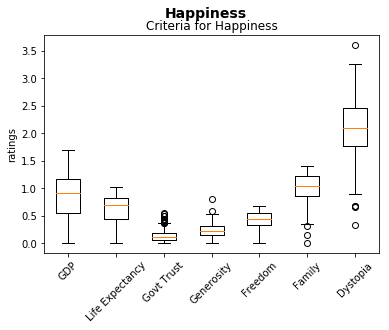

In [8]:
g_cap = happy_data.loc[:,'GDP_per_Capita']
life_x = happy_data.loc[:,'Life_Expectancy']
govt_trust = happy_data.loc[:,'Trust_Govt_Corruption']
freed = happy_data.loc[:, 'Freedom']
fam = happy_data.loc[:, 'Family']
generos = happy_data.loc[:, 'Generosity']
dyst = happy_data.loc[:, 'Dystopia_Residual']
data = [g_cap, life_x, govt_trust, generos, freed, fam, dyst]

# figure related code
fig = plt.figure()
fig.suptitle('Happiness', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(data)

ax.set_title('Criteria for Happiness')
ax.set_xlabel('')
ax.set_ylabel('ratings')
ax.set_xticklabels(['GDP', 'Life Expectancy', 'Govt Trust', 'Generosity', 'Freedom', 'Family', 'Dystopia'], rotation=45)

plt.show()

<h4> Outliers </h4><br/>
Four of the seven criteria for happiness have outliers. The family outliers are lower and can be contributed to those who possibly didn't answer, since describing the data showed the lowest family rating was a zero. The other outliers (Government Trust, Generosity, and Dystopia) will all be interesting to look at since they have high ranking outliers. That could mean that though these are things that may make a country happy, their overall happiness scores are low.

## Examining question 1: Does a high happiness score correlate to happiness across all criteria?

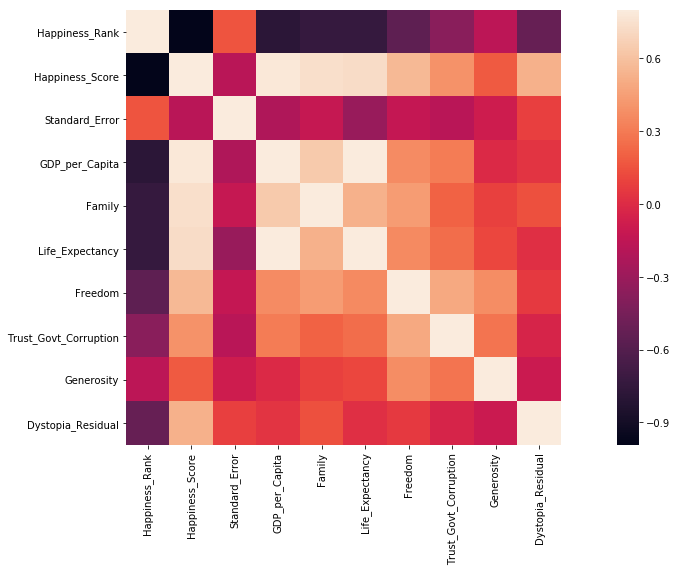

In [9]:
corrmat = happy_data.corr()
plt.figure(figsize = (20,8))
sns.heatmap(corrmat, vmax=.8, square=True)

<b>This heat map shows there are strong correlations between GDP per Capita, Family, and Life Expectancy, both amongst those three and comparing those three to happiness score. </b>

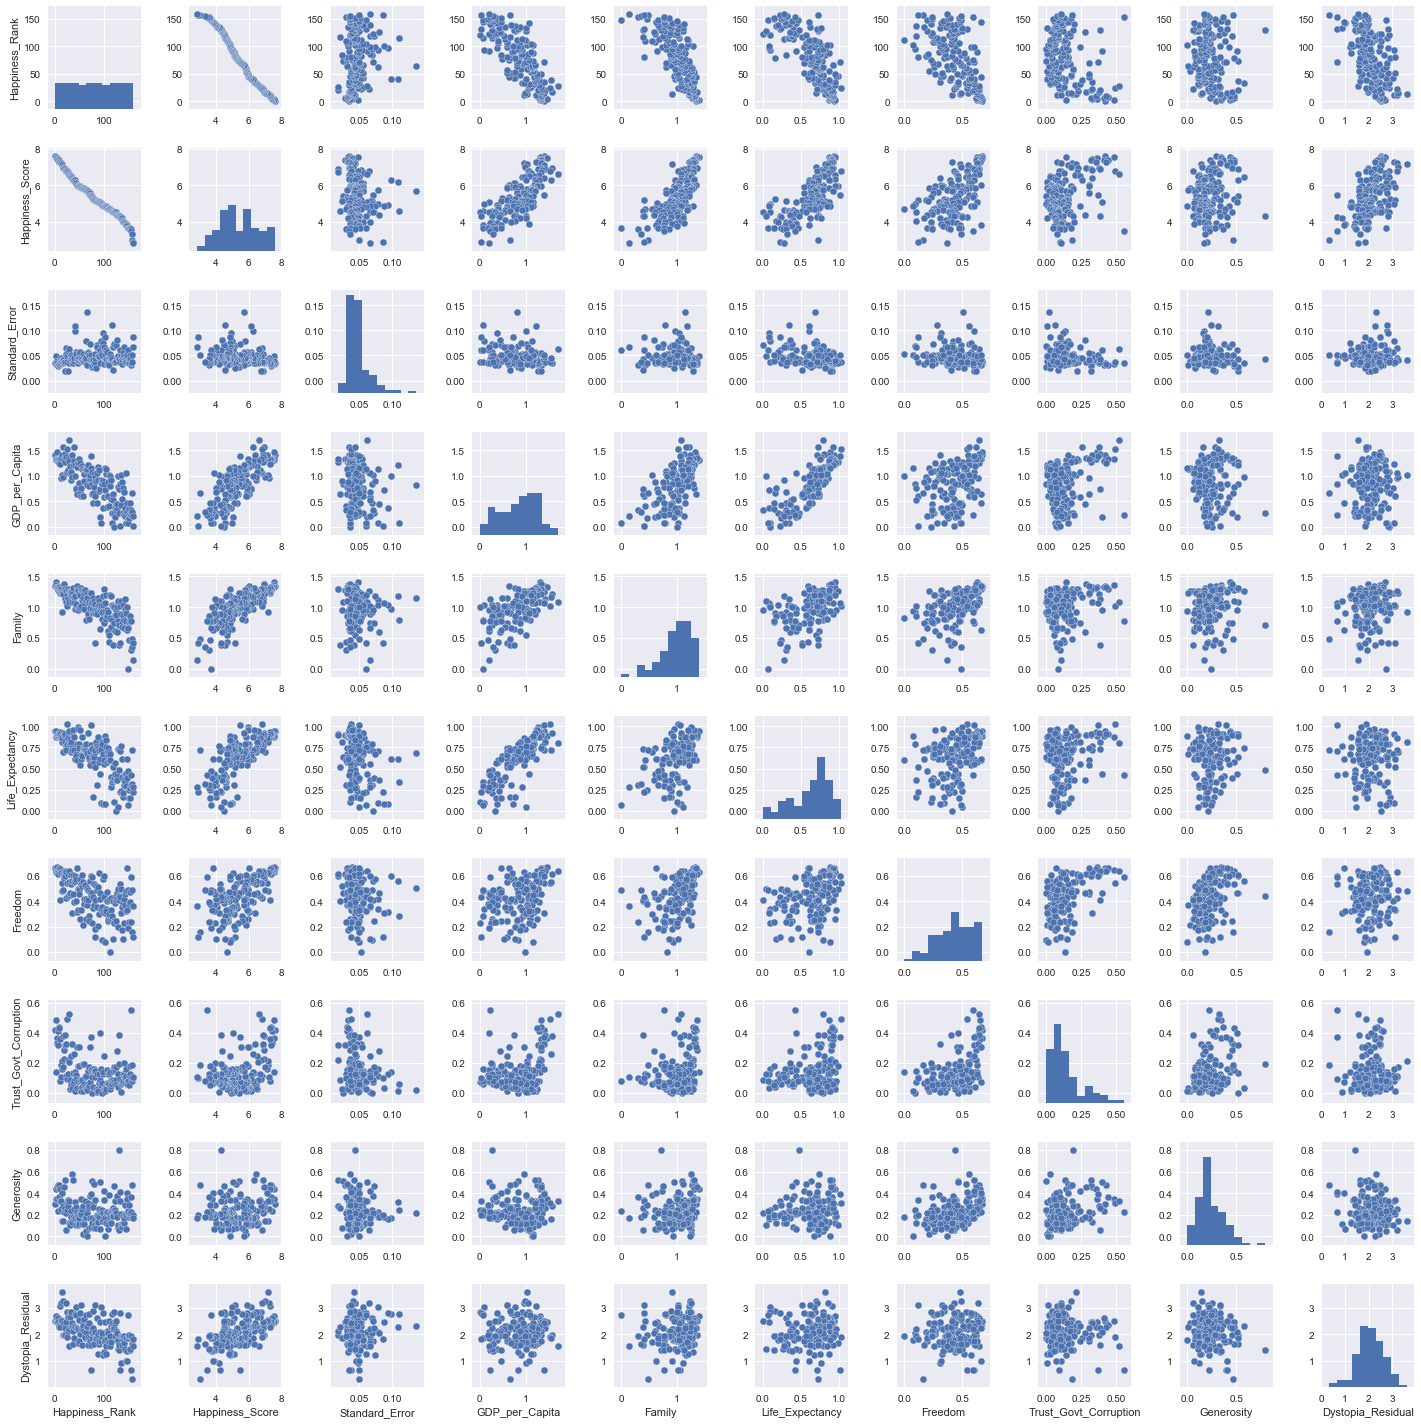

In [10]:
#scatterplot
sns.set()
sns.pairplot(happy_data, size = 2) #2.5
plt.show()

<b>We can easily see that GDP per Capita, Family, and Life Expectancy (health) are all positively correlated with happiness scores. People living in countries with relative wealth, who are more family oriented, and who live longer healthier lives tend to be happier.</b>

Text(0.5,1,'Top 25 Happiest Countries')

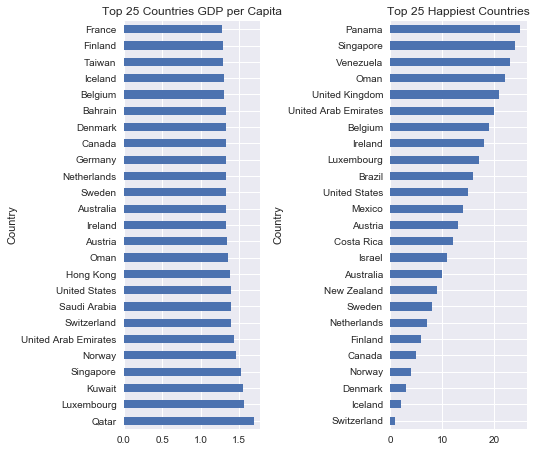

In [11]:
plt.figure(figsize = (12, 7.5))
plt.subplots_adjust(wspace=0.95)

# GDP Ranking
plt.subplot(1, 3, 1)
x = happy_data.groupby('Country')['GDP_per_Capita'].mean().sort_values(ascending=False).head(25)
x.plot(kind='barh')
plt.title('Top 25 Countries GDP per Capita')

# Happiness Ranking
plt.subplot(1, 3, 2)
x = happy_data.groupby('Country')['Happiness_Rank'].mean().sort_values(ascending=True).head(25)
x.plot(kind='barh')
plt.title('Top 25 Happiest Countries')

<b>Of the top 25 GDP per capita countries, 17 of them are ranked as the top happiest countries. That equates to about 68% of wealthier (per capita) countries being happier. Money can't buy happiness but it helps. If I did resource and population regionalization certain countries may not be as high on the GDP list, but that is left to further research. </b>

In [12]:
# convert to lists
# find top 25 GDP countries that are ranked top 25
x = happy_data.groupby('Country')['GDP_per_Capita'].mean().sort_values(ascending=False).head(25)
y = happy_data.groupby('Country')['Happiness_Rank'].mean().sort_values(ascending=True).head(25)

gdpList = x.index.tolist()
rankList = y.index.tolist()

rank_gdp = []

# comparing values in two lists
# find top 25 GDP that are ranked top 25 in happiness
for item in gdpList:
    for item1 in rankList:
        if item == item1:
            rank_gdp.append(item)  

print(rank_gdp)
print(len(rank_gdp))

['Luxembourg', 'Singapore', 'Norway', 'United Arab Emirates', 'Switzerland', 'United States', 'Oman', 'Austria', 'Ireland', 'Australia', 'Sweden', 'Netherlands', 'Canada', 'Denmark', 'Belgium', 'Iceland', 'Finland']
17


#### Now that we have seen some of the determining factors of happiness, we can look at how the top middle and lowest ranked countries compare.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

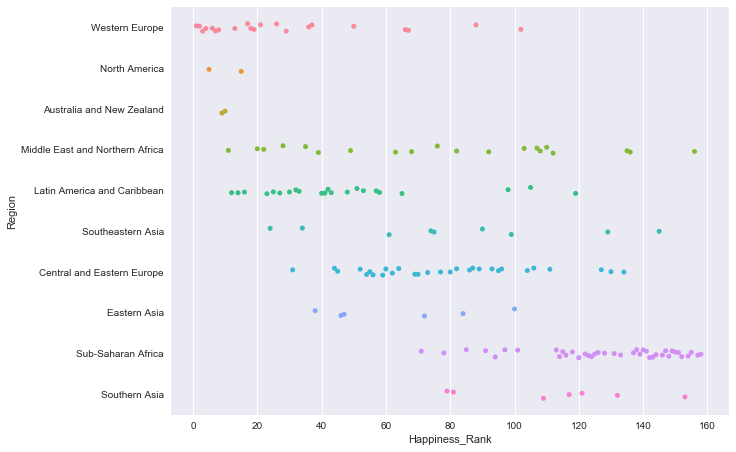

In [13]:
plt.figure(figsize = (10, 7.5))
g = sns.stripplot(x="Happiness_Rank", y="Region", data=happy_data, jitter=True)
plt.yticks(rotation=0)

## How do the top 25 countries compare to the middle and lowest ranked countries? <br/>
Of the top 25 happiest countries, most of them are from the Western Europe region. Both North America and Australia and New Zealand are comprised of only 2 countries and both rank in the top 25. The remaining top countries are from the Middle East and Northern Africa, Latin America and the Caribbean. The M.E. and N. A are spread out more homogenously between high and low ranking countries, while L.A. and Carib. are clustered toward higher rankings with none of their countries in the lower quartile ranking. Three countries are ranked in the bottom 20 from different regions, with the remaining 17 unhappiest countries being located in Sub-Saharan Africa. Criteria like government corruption and lack of freedom for many lend to lower happiness rankings.

In [14]:
happy_data.groupby(happy_data['Region']).describe()

Dystopia_Residual                      \
                                            count      mean       std   
Region                                                                  
Australia and New Zealand                     2.0  2.265355  0.001563   
Central and Eastern Europe                   29.0  2.021400  0.468624   
Eastern Asia                                  6.0  1.681607  0.616479   
Latin America and Caribbean                  22.0  2.622577  0.522565   
Middle East and Northern Africa              20.0  1.980009  0.543701   
North America                                 2.0  2.480935  0.041260   
Southeastern Asia                             9.0  1.783020  0.398172   
Southern Asia                                 7.0  2.016769  0.760337   
Sub-Saharan Africa                           40.0  2.019980  0.553476   
Western Europe                               21.0  2.151185  0.379951   

                                                                        \
                                     min       25%       50%       75%   
Region                                                                   
Australia and New Zealand        2.26425  2.264803  2.265355  2.265907   
Central and Eastern Europe       0.89991  1.739330  2.025000  2.246390   
Eastern Asia                     0.65429  1.431780  1.772375  2.129935   
Latin America and Caribbean      1.21305  2.320640  2.709200  2.855148   
Middle East and Northern Africa  0.32858  1.727078  1.998595  2.293595   
North America                    2.45176  2.466347  2.480935  2.495522   
Southeastern Asia                0.98195  1.737990  1.863990  1.885410   
Southern Asia                    0.67108  1.795020  1.956370  2.396400   
Sub-Saharan Africa               0.67042  1.669332  1.950050  2.458260   
Western Europe                   1.26462  1.969610  2.123670  2.465700   

                                         Family             ...     \
                                     max  count      mean   ...      
Region                                                      ...      
Australia and New Zealand        2.26646    2.0  1.314450   ...      
Central and Eastern Europe       3.10712   29.0  1.053042   ...      
Eastern Asia                     2.32323    6.0  1.099427   ...      
Latin America and Caribbean      3.60214   22.0  1.104720   ...      
Middle East and Northern Africa  3.08854   20.0  0.920490   ...      
North America                    2.51011    2.0  1.284860   ...      
Southeastern Asia                2.31945    9.0  0.940468   ...      
Southern Asia                    3.10709    7.0  0.645321   ...      
Sub-Saharan Africa               3.05137   40.0  0.809085   ...      
Western Europe                   2.70201   21.0  1.247302   ...      

                                Standard_Error          Trust_Govt_Corruption  \
                                           75%      max                 count   
Region                                                                          
Australia and New Zealand             0.039050  0.04083                   2.0   
Central and Eastern Europe            0.048640  0.06913                  29.0   
Eastern Asia                          0.040405  0.05051                   6.0   
Latin America and Caribbean           0.063070  0.13693                  22.0   
Middle East and Northern Africa       0.051323  0.07832                  20.0   
North America                         0.037675  0.03839                   2.0   
Southeastern Asia                     0.049340  0.06698                   9.0   
Southern Asia                         0.036665  0.03751                   7.0   
Sub-Saharan Africa                    0.067303  0.11068                  40.0   
Western Europe                        0.042060  0.05635                  21.0   

                                                                        \
                                     mean       std      min       25%   
Region

The countries have been divided into 10 different world regions, which can be seen above. 
## There are 10 different geographical regions that the counties have been grouped in. Are there similarities between the regions (regardless of happiness score)?
Further, does each region accurately represent the countries that comprise it?

<b>Below is an interactive global map showing how each country ranks. If you hover over a country it will display the happiness score. <br/>
*Note: if you do not see the map or the standalone HTML file created (new tab), you can view the map <a href="https://plot.ly/~AshleyCubed/3?share_key=zSfnbNsuHS0pUgfGBt2JmR">here</a>.</b>

In [19]:
import plotly
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plotly.tools.set_credentials_file(username='Ashleycubed', api_key='fSZV8AREFrRoPZRfbJjV')
plotly.offline.init_notebook_mode(connected=True) #offline mode

In [20]:
data = dict(type='choropleth',
locations = happy_data['Country'],
locationmode = 'country names', z = happy_data['Happiness_Score'],
text = happy_data['Country'], colorbar = {'title':'Happiest Countries'},
colorscale = 'Viridis', reversescale = True)

layout = dict(title='2015 World Happiness',
geo = dict(showframe=False,projection={'type':'mercator'}))

choromap = go.Figure(data = [data],layout = layout)
plotly.offline.iplot(choromap,validate=False) #runs in ipython notebook
#plotly.offline.plot(choromap,validate=False) #creates standalone HTML that is saved locally and opened inside web browser.

It seems that virtually all countries in the western hemisphere happier. Western Europe and Australia and New Zealand are the two outlying regions noticeably happier on that side of the world. Visually there don't seem to be any significant outliers in each region, but I'm going to explore that further.

In [17]:
compareCols = ['Happiness_Score','GDP_per_Capita','Family','Life_Expectancy','Freedom','Trust_Govt_Corruption']
def plot_compare(dataset,regions,compareCols):
    n = len(compareCols)
    f, axes = plt.subplots(math.ceil(n/2), 2, figsize=(16, 6*math.ceil(n/2)))
    axes = axes.flatten()
    #compareCols = ['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
    for i in range(len(compareCols)):
        col = compareCols[i]
        axi = axes[i]
        for region in regions:
            this_region = dataset[dataset['Region']==region]
            sns.distplot(this_region[col], label=region, ax=axi)
            #sns.palplot(sns.color_palette(n_colors=10)) #change hist and kde line colors
        axi.legend()

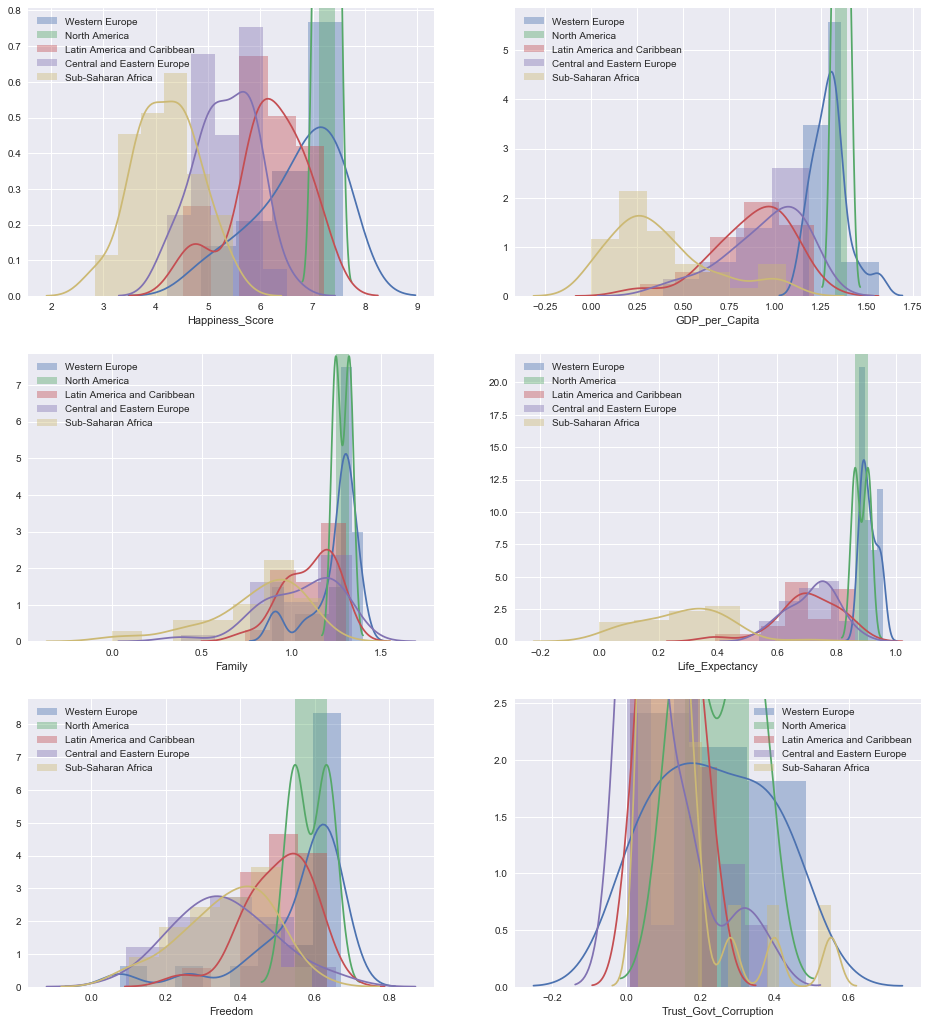

In [18]:
plot_compare(happy_data,['Western Europe', 'North America', 'Latin America and Caribbean', 'Central and Eastern Europe',
       'Sub-Saharan Africa'],['Happiness_Score','GDP_per_Capita','Family','Life_Expectancy','Freedom','Trust_Govt_Corruption'])

Plotting all 10 regions would make it difficult to read. So I chose half the regions making sure to include the most, least, and average happiest countries. Four of the six happiness criteria  follow fairly smooth curves. Family and trust for the government have quite a few discrepancies. Four of the five regions have varying views about family. Sub-Saharan African nations seem to have consistent views on family. On the other hand, trust and government corruption shows that each region has their issues, but Sub-Saharan Africa has some noticeable trust issues, which can be seen in the humps at in the tail.<br/>
So there are some similarities between regions, but each region doesn't always accurately represent the countries that comprise it for the qualifying happiness criteria.

## Furthering research on World Happiness
To get a more in depth look on 'happiness' I think it would be beneficial to add to more criteria columns such as one for population size to explore linear relationships between GDP and population size using scatter plots. I'd like to learn how to add a column(s) from one data set to the main dataset that I'm working with. I would also like to see how this information could be created into a time series (something I'd like to learn more about) because these surveys have been given and reported on since the early 2000s, and it would be interesting to see how regions and countries change over time.